In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [276]:
df = pd.read_csv('insurance.csv')

In [277]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [278]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


<AxesSubplot:>

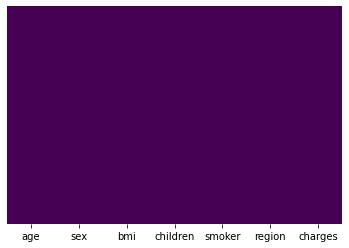

In [279]:
sns.heatmap(data=df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#the data is perfect with no missing data

/Users/kamyinli/.conda/envs/mypy39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

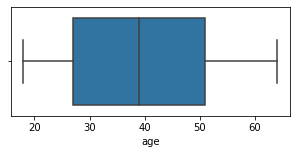

In [280]:
plt.figure(figsize=(5,2))
sns.boxplot(df['age'])
#the mean age of the dataset is around 40. 

/Users/kamyinli/.conda/envs/mypy39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

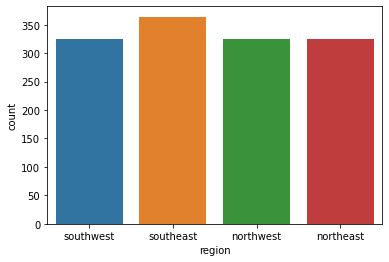

In [281]:
sns.countplot(df['region'])
#living location of the people in the dataset is evenly distributed

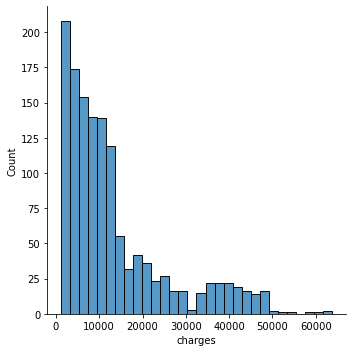

In [300]:
sns.displot(data=df['charges'])

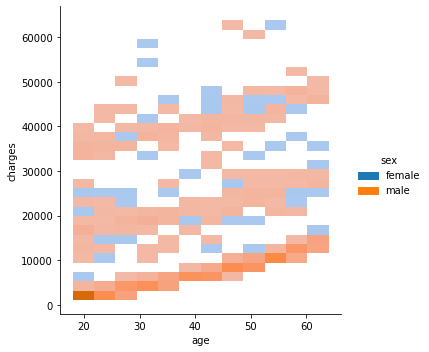

In [284]:
sns.displot(x='age', y='charges',data=df,hue='sex')

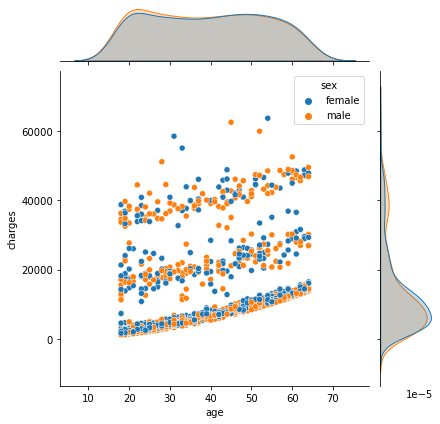

In [351]:
sns.jointplot(data=df,x='age', y='charges',hue='sex')
#age is one of the factors that affecting the chargers. The higher the age, the higher chargers
#sex is not affecting the charges

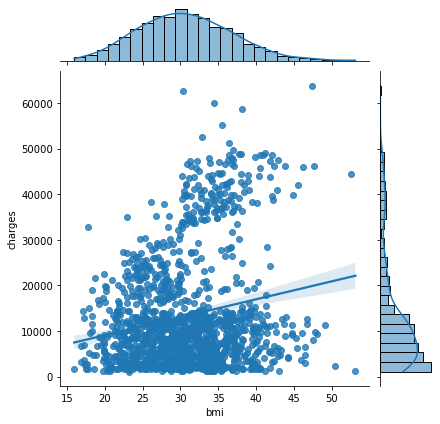

In [298]:
sns.displot(data=df,x='bmi', y='charges',kind='reg')

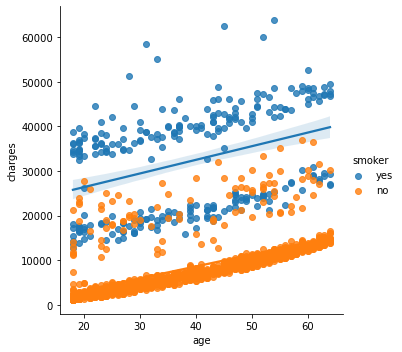

In [352]:
sns.lmplot(x='age', y='charges',data=df,hue='smoker')
#smokers are paying much higher charges than non smokers

<AxesSubplot:ylabel='mean charges'>

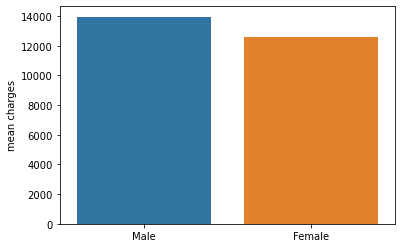

In [326]:
male_mean = df[df['sex']=='male']['charges'].mean()
female_mean = df[df['sex']=='female']['charges'].mean()
mean = pd.DataFrame(data=[male_mean,female_mean],index=['Male','Female'],columns=['mean charges'])
sns.barplot(data=mean, x=mean.index, y='mean charges')
#the average price of male is slightly higher than Female

<AxesSubplot:xlabel='smoker', ylabel='count'>

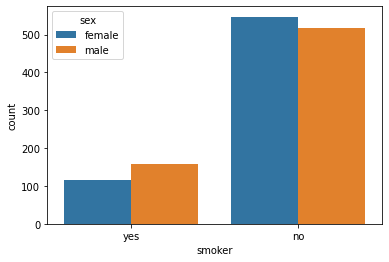

In [353]:
sns.countplot(x='smoker',data=df,hue='sex')
#the total cost for men will be more than women as there are more male smoker. 

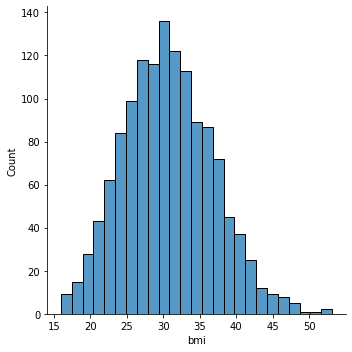

In [354]:
sns.displot(data=df,x='bmi')
#most people bmi is at around 30

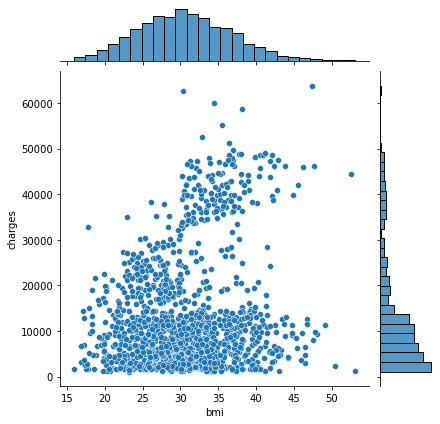

In [355]:
sns.jointplot(x='bmi', y='charges',data=df)
#seems like the bmi number does not affect the chargers much

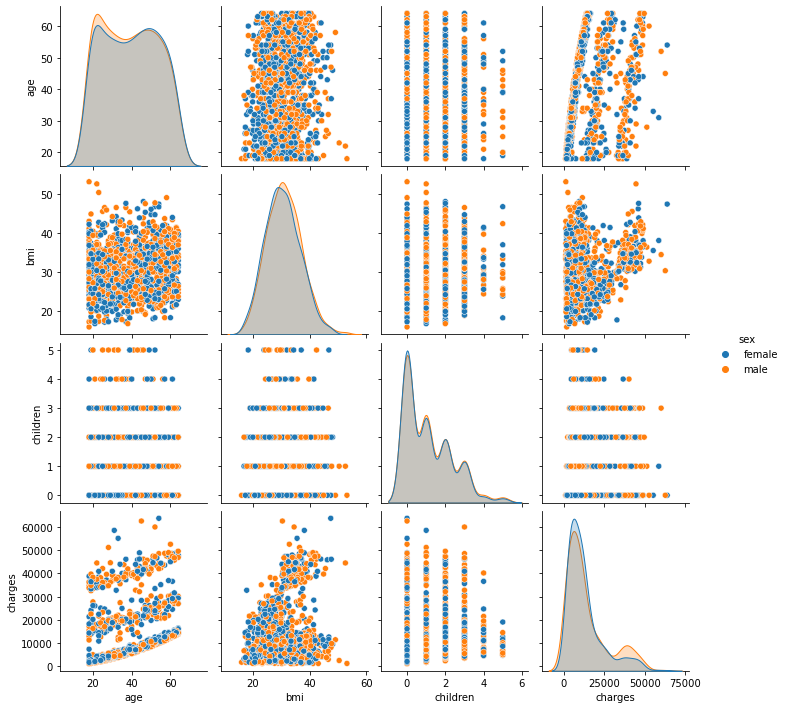

In [250]:
sns.pairplot(df,hue='sex')
#the dataset contain less outliers

In [356]:
gender = pd.get_dummies(df['sex'], drop_first=True) #0>female 1>male
smoker_or_not = pd.get_dummies(df['smoker'], drop_first=True) #1>yes 0>no
living_region = pd.get_dummies(df['region'], drop_first=True)

In [357]:
df = pd.concat([df,gender,smoker_or_not,living_region],axis=1)

In [358]:
df.drop(['smoker','sex','region'],axis=1,inplace=True)

In [359]:
df.rename(columns={"yes":"smoker"}, inplace=True)

In [360]:
df

,age,bmi,children,charges,male,smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


<AxesSubplot:>

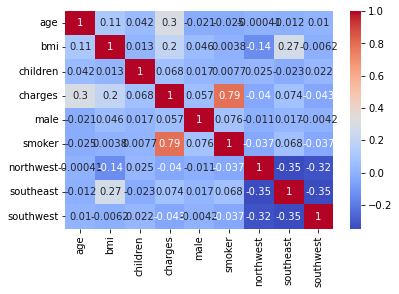

In [361]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
#smokers are paying much higher charges than non smokers in correlation calculation

In [362]:
from sklearn.model_selection import train_test_split

In [382]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [383]:
from sklearn.linear_model import LinearRegression

In [384]:
model = LinearRegression()

In [385]:
model.fit(X_train,y_train)

LinearRegression()

In [386]:
model.coef_ 

array([ 2.33240483e+02,  3.81306262e+02,  4.80242849e+02,  6.37126082e+01,
        2.35952534e+04, -1.01322998e+01, -9.03375616e+02, -1.04380223e+03])

In [387]:
cdf = pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coeff'])

In [388]:
#the formula and the coefficent of the model
cdf

,Coeff
age,233.240483
bmi,381.306262
children,480.242849
male,63.712608
smoker,23595.253380
northwest,-10.132300
southeast,-903.375616
southwest,-1043.802228


# predictions

In [389]:
prediction = model.predict(X_test)

In [390]:
prediction

array([11107.03144547,  3213.25103845, 10419.53960534, 27321.03790005,
        6364.43833858,   600.81289443, 15295.90157541,  4268.81324154,
       11218.17389264,  7208.65934886,  8275.85201413, 10553.99889521,
        6547.53656683, 12534.13478539, 30659.17748371, 36928.09000679,
       10579.22833626,  3066.22119137, 15020.56041645, 13643.40114854,
       30007.18660761,  7160.76487127, 12823.97134874,  5910.96101633,
         637.03698928, 25194.0056656 , 11819.7198177 , 27461.53951392,
       38223.01717844,  4576.13427521,  6257.87143645,  7109.26406629,
        3721.84866576,  2726.1042907 ,  6218.88380748,  6182.38769838,
         481.04610561, 12522.40607478, 13669.92542442, 10763.58640442,
       10056.21564318,  9444.96724905, 14859.80266555, 10250.31921268,
        6364.24548571,  6624.99943571,  8257.25668293,  2423.77704861,
       12729.45357651,  2350.90414299, -1458.23964471,  2821.44501694,
        7530.61210574,  9021.99812261,  4609.29213985, 14132.29827365,
      

In [391]:
y_test

44       6079.67150
134      2457.21115
980     25517.11363
618     34439.85590
1238     6985.50695
           ...     
625      3736.46470
1020     8798.59300
877      6653.78860
171      8116.68000
204      7147.10500
Name: charges, Length: 536, dtype: float64

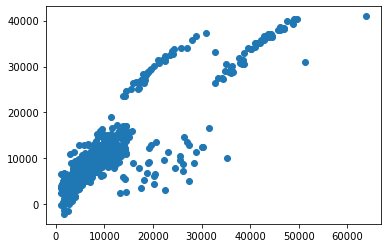

In [399]:
plt.scatter(y_test, prediction) #aligning > good job

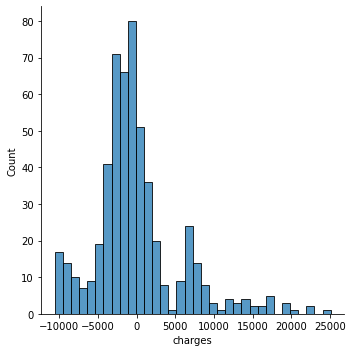

In [393]:
sns.displot((y_test-prediction))

In [394]:
from sklearn import metrics #to minimize error

In [395]:
metrics.mean_absolute_error(y_test,prediction) #MAE between our prediction and real answer

3922.9908563112117

In [396]:
metrics.mean_squared_error(y_test,prediction) #MSE

31699995.632930387

In [397]:
np.sqrt(metrics.mean_squared_error(y_test,prediction)) #RMSE

5630.27491628343